In [3]:
from IPython.display import Markdown, display

markdown_content = """
# Image Classification and the Rise of CNNs

Image classification is one of the most fundamental tasks in computer vision. It plays a critical role in various fields like medical imaging, autonomous vehicles, facial recognition, and more.  
The field of Computer Vision has been around for more than a decade now. Since the discovery of the AlexNet architecture by Alex Krizhevsky in 2012, the field has witnessed rapid advancements.  

## Why CNNs for Image-Related Tasks?

Starting with Convolutional Neural Networks (CNNs), these have been used for image-related tasks from the earliest days. Ever wondered why CNNs were chosen over Recurrent Neural Networks (RNNs), Graph Neural Networks (GNNs), or even simple fully connected neural networks?  

### The Answer Lies in the Data  

Image data is unique, and this uniqueness corresponds to the architectural strengths of CNNs. CNNs are primarily composed of convolutional layers, which help filter out important features from images.  

### Spatial Hierarchies in Images  

Images have spatial hierarchies—patterns, edges, textures, and structures distributed across two dimensions. If you've ever taken a course in image processing, you might be familiar with convolution operations used for edge detection. That’s one of the fundamental tasks we rely on for detecting features in images.  

But CNNs don’t stop there. They employ mechanisms like **weight sharing** through convolutional kernels to significantly reduce the number of parameters, addressing the high dimensionality of image data. This makes CNNs both computationally efficient and highly effective for image-related tasks.  

"""

display(Markdown(markdown_content))



# Image Classification and the Rise of CNNs

Image classification is one of the most fundamental tasks in computer vision. It plays a critical role in various fields like medical imaging, autonomous vehicles, facial recognition, and more.  
The field of Computer Vision has been around for more than a decade now. Since the discovery of the AlexNet architecture by Alex Krizhevsky in 2012, the field has witnessed rapid advancements.  

## Why CNNs for Image-Related Tasks?

Starting with Convolutional Neural Networks (CNNs), these have been used for image-related tasks from the earliest days. Ever wondered why CNNs were chosen over Recurrent Neural Networks (RNNs), Graph Neural Networks (GNNs), or even simple fully connected neural networks?  

### The Answer Lies in the Data  

Image data is unique, and this uniqueness corresponds to the architectural strengths of CNNs. CNNs are primarily composed of convolutional layers, which help filter out important features from images.  

### Spatial Hierarchies in Images  

Images have spatial hierarchies—patterns, edges, textures, and structures distributed across two dimensions. If you've ever taken a course in image processing, you might be familiar with convolution operations used for edge detection. That’s one of the fundamental tasks we rely on for detecting features in images.  

But CNNs don’t stop there. They employ mechanisms like **weight sharing** through convolutional kernels to significantly reduce the number of parameters, addressing the high dimensionality of image data. This makes CNNs both computationally efficient and highly effective for image-related tasks.  



In [4]:
from IPython.display import Markdown, display

def print_md(markdown_content):
    display(Markdown(markdown_content))

In [5]:
print_md("## Code Implementation of a Simple CNN") 

## Code Implementation of a Simple CNN

In [6]:
print_md("### 1. We wil start with exploring the dataset first and then creating a data loader for the same.") 

### 1. We wil start with exploring the dataset first and then creating a data loader for the same.

In [7]:
print_md(" Dataset link: https://www.kaggle.com/datasets/praveengovi/coronahack-chest-xraydataset/data")

 Dataset link: https://www.kaggle.com/datasets/praveengovi/coronahack-chest-xraydataset/data

In [8]:
import pandas as pd

metadata = pd.read_csv("/home/satvik/corona_detection/Chest_xray_Corona_Metadata.csv")
base_path = "/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset"
train_dir = f"{base_path}/train/"
test_dir = f"{base_path}/test/"

metadata['Full_Image_Path'] = metadata.apply(
    lambda row: f"{train_dir}{row['X_ray_image_name']}" if row['Dataset_type'] == 'TRAIN' else f"{test_dir}{row['X_ray_image_name']}",
    axis=1
)

train_data = metadata[metadata['Dataset_type'] == 'TRAIN']
test_data = metadata[metadata['Dataset_type'] == 'TEST']

train_paths = train_data['Full_Image_Path'].tolist()
train_labels = train_data['Label'].tolist()

test_paths = test_data['Full_Image_Path'].tolist()
test_labels = test_data['Label'].tolist()

print("Train set size:", len(train_paths))
print("Test set size:", len(test_paths))

print("Sample train paths and labels:", list(zip(train_paths[:5], train_labels[:5])))
print("Sample test paths and labels:", list(zip(test_paths[:5], test_labels[:5]))) 

Train set size: 5286
Test set size: 624
Sample train paths and labels: [('/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0128-0001.jpeg', 'Normal'), ('/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0127-0001.jpeg', 'Normal'), ('/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0125-0001.jpeg', 'Normal'), ('/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0122-0001.jpeg', 'Normal'), ('/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0119-0001.jpeg', 'Normal')]
Sample test paths and labels: [('/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/IM-0021-0001.jpeg', 'Normal'), ('/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/IM-0019-0001.jpeg', 'Normal

In [9]:
print_md("### 2. Now we will create a custom dataset class to load the data. We'll also apply image tranformation techniques to the images and apply label encoder to encode string labels")

### 2. Now we will create a custom dataset class to load the data. We'll also apply image tranformation techniques to the images and apply label encoder to encode string labels

In [27]:
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image

image_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])  
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]) 
    ])
}

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(metadata['Label'])  

train_labels_encoded = label_encoder.transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

for i, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {i}")

class XRayDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels  
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('L')  
        if self.transform:
            image = self.transform(image)
        label = self.labels[idx] 

        return image, label

train_dataset = XRayDataset(train_paths, train_labels_encoded, transform=image_transforms['train'])
test_dataset = XRayDataset(test_paths, test_labels_encoded, transform=image_transforms['test'])

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

Normal -> 0
Pnemonia -> 1


In [11]:
print_md("### 3. Now we will define a simple CNN model using PyTorch")

### 3. Now we will define a simple CNN model using PyTorch

In [12]:
import torch.nn as nn
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        flattened_size = 64 * 56 * 56
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(flattened_size, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

num_classes = len(metadata['Label'].unique())
model = SimpleCNN(num_classes)
print(model)

SimpleCNN(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=200704, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=2, bias=True)
  )
)


In [13]:
print_md("### 4. Now a task for you is to calculate the nmumber of params in this simple CNN model")

### 4. Now a task for you is to calculate the nmumber of params in this simple CNN model

In [15]:
print_md("### 5. Now we will a function for evals")

### 5. Now we will a function for evals

In [16]:
import torch
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, dataloader, device):
    model.eval()
    all_preds, all_labels = [], []
    
    with torch.no_grad():
        for batch in dataloader:
            images = batch[0]
            labels = torch.tensor(batch[1], dtype=torch.long)
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
                
    print(classification_report(all_labels, all_preds))
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()

In [17]:
print_md("### 6. Here we goooo, now we will train the model")

### 6. Here we goooo, now we will train the model

/tmp/ipykernel_277732/3901144993.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch[1], dtype=torch.long)


Epoch 1/10 - Loss: 0.2558, Accuracy: 0.9062


/tmp/ipykernel_277732/85101823.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch[1], dtype=torch.long)


              precision    recall  f1-score   support

           0       0.97      0.28      0.43       234
           1       0.70      0.99      0.82       390

    accuracy                           0.73       624
   macro avg       0.83      0.64      0.63       624
weighted avg       0.80      0.73      0.67       624



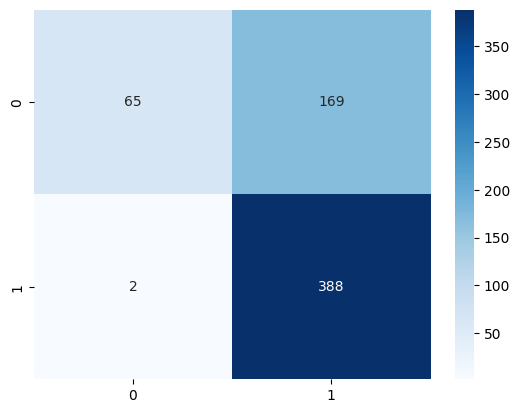

/tmp/ipykernel_277732/3901144993.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch[1], dtype=torch.long)


Epoch 2/10 - Loss: 0.1376, Accuracy: 0.9480


/tmp/ipykernel_277732/85101823.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch[1], dtype=torch.long)


              precision    recall  f1-score   support

           0       0.92      0.39      0.55       234
           1       0.73      0.98      0.83       390

    accuracy                           0.76       624
   macro avg       0.82      0.68      0.69       624
weighted avg       0.80      0.76      0.73       624



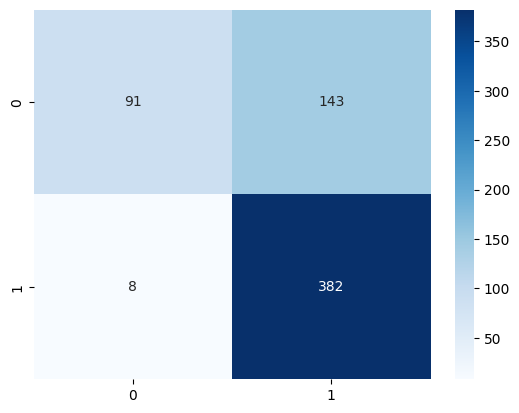

/tmp/ipykernel_277732/3901144993.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch[1], dtype=torch.long)


Epoch 3/10 - Loss: 0.1226, Accuracy: 0.9540


/tmp/ipykernel_277732/85101823.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch[1], dtype=torch.long)


              precision    recall  f1-score   support

           0       0.83      0.73      0.78       234
           1       0.85      0.91      0.88       390

    accuracy                           0.84       624
   macro avg       0.84      0.82      0.83       624
weighted avg       0.84      0.84      0.84       624



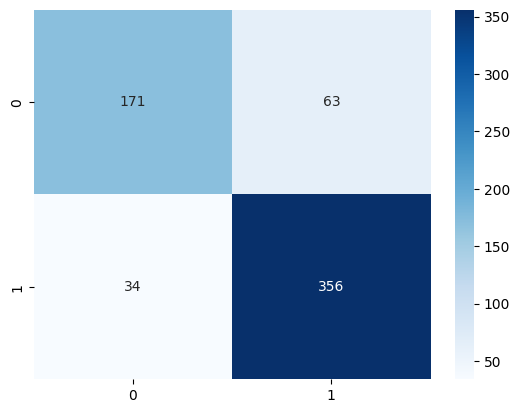

/tmp/ipykernel_277732/3901144993.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch[1], dtype=torch.long)


Epoch 4/10 - Loss: 0.1110, Accuracy: 0.9582


/tmp/ipykernel_277732/85101823.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch[1], dtype=torch.long)


              precision    recall  f1-score   support

           0       0.96      0.29      0.44       234
           1       0.70      0.99      0.82       390

    accuracy                           0.73       624
   macro avg       0.83      0.64      0.63       624
weighted avg       0.80      0.73      0.68       624



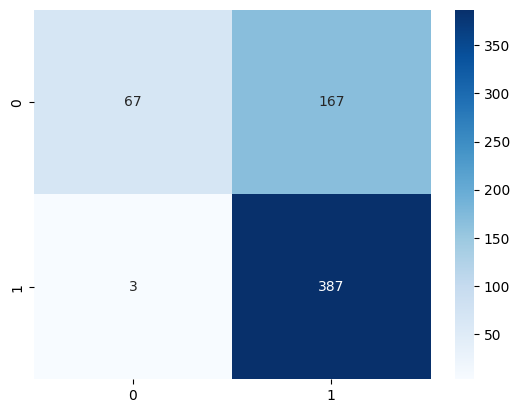

/tmp/ipykernel_277732/3901144993.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch[1], dtype=torch.long)


Epoch 5/10 - Loss: 0.1074, Accuracy: 0.9595


/tmp/ipykernel_277732/85101823.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch[1], dtype=torch.long)


              precision    recall  f1-score   support

           0       0.94      0.53      0.68       234
           1       0.78      0.98      0.87       390

    accuracy                           0.81       624
   macro avg       0.86      0.75      0.77       624
weighted avg       0.84      0.81      0.80       624



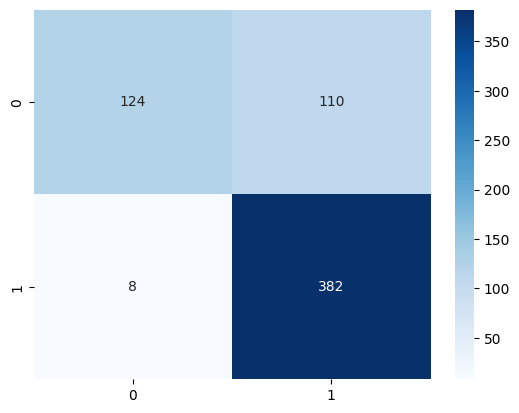

/tmp/ipykernel_277732/3901144993.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch[1], dtype=torch.long)


Epoch 6/10 - Loss: 0.1024, Accuracy: 0.9612


/tmp/ipykernel_277732/85101823.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch[1], dtype=torch.long)


              precision    recall  f1-score   support

           0       0.96      0.31      0.47       234
           1       0.71      0.99      0.83       390

    accuracy                           0.74       624
   macro avg       0.83      0.65      0.65       624
weighted avg       0.80      0.74      0.69       624



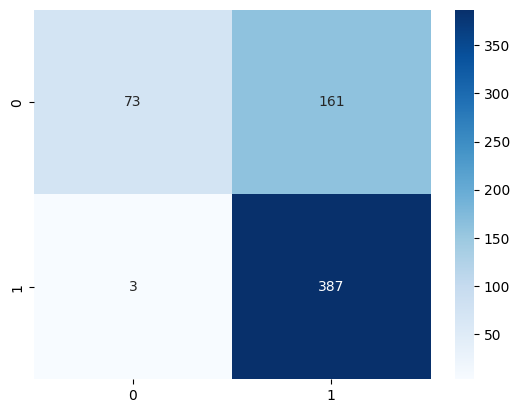

/tmp/ipykernel_277732/3901144993.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch[1], dtype=torch.long)


Epoch 7/10 - Loss: 0.0864, Accuracy: 0.9688


/tmp/ipykernel_277732/85101823.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch[1], dtype=torch.long)


              precision    recall  f1-score   support

           0       0.96      0.49      0.65       234
           1       0.76      0.99      0.86       390

    accuracy                           0.80       624
   macro avg       0.86      0.74      0.76       624
weighted avg       0.84      0.80      0.78       624



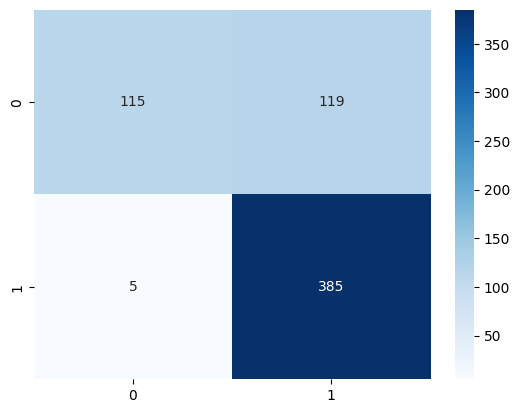

/tmp/ipykernel_277732/3901144993.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch[1], dtype=torch.long)


Epoch 8/10 - Loss: 0.0864, Accuracy: 0.9694


/tmp/ipykernel_277732/85101823.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch[1], dtype=torch.long)


              precision    recall  f1-score   support

           0       0.90      0.48      0.63       234
           1       0.76      0.97      0.85       390

    accuracy                           0.79       624
   macro avg       0.83      0.72      0.74       624
weighted avg       0.81      0.79      0.77       624



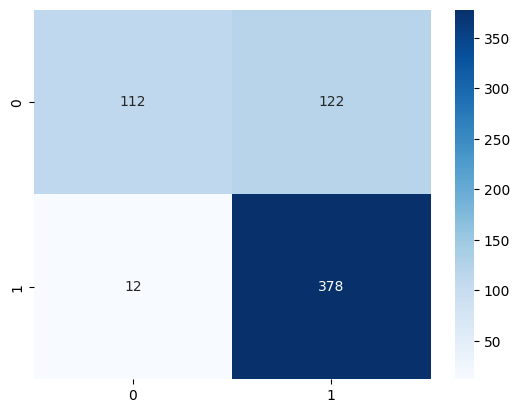

/tmp/ipykernel_277732/3901144993.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch[1], dtype=torch.long)


Epoch 9/10 - Loss: 0.0890, Accuracy: 0.9688


/tmp/ipykernel_277732/85101823.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch[1], dtype=torch.long)


              precision    recall  f1-score   support

           0       0.95      0.41      0.57       234
           1       0.74      0.99      0.84       390

    accuracy                           0.77       624
   macro avg       0.84      0.70      0.71       624
weighted avg       0.82      0.77      0.74       624



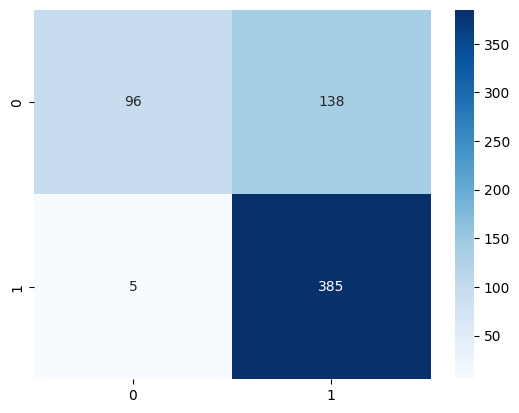

/tmp/ipykernel_277732/3901144993.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch[1], dtype=torch.long)


Epoch 10/10 - Loss: 0.0790, Accuracy: 0.9697


/tmp/ipykernel_277732/85101823.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch[1], dtype=torch.long)


              precision    recall  f1-score   support

           0       0.96      0.36      0.53       234
           1       0.72      0.99      0.83       390

    accuracy                           0.75       624
   macro avg       0.84      0.68      0.68       624
weighted avg       0.81      0.75      0.72       624



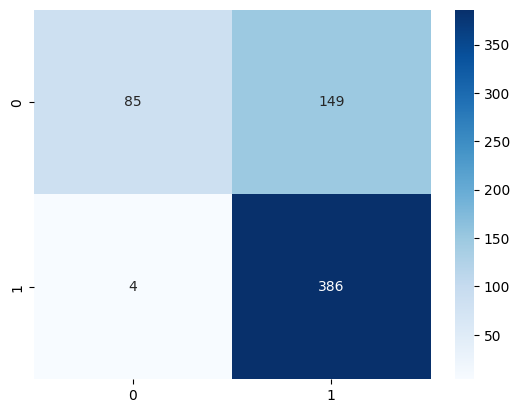

Model saved to simple_cnn_model.pth
Training complete


In [18]:
import torch.optim as optim

def train_model(model, train_loader, test_loader, num_epochs, device, learning_rate=0.001, save_path="model.pth"):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for batch in train_loader:
            images = batch[0]
            labels = torch.tensor(batch[1], dtype=torch.long)
            
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = correct / total

        print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")
        evaluate_model(model, test_loader, device)

    torch.save(model.state_dict(), save_path)
    print(f"Model saved to {save_path}")

    print("Training complete")

num_classes = len(metadata['Label'].unique())
model = SimpleCNN(num_classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_model(model, train_loader, test_loader, num_epochs=10, device=device, save_path="simple_cnn_model.pth")


In [29]:
print_md("### 7. Now we will evaluate the model")

### 7. Now we will evaluate the model

In [28]:
model.eval()
test_predictions = []
test_labels_list = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)

        _, predicted = torch.max(outputs, 1)
        test_predictions.extend(predicted.cpu().numpy())
        test_labels_list.extend(labels.cpu().numpy())

from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(test_labels_list, test_predictions) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 75.48%


In [30]:
print_md("### 8. Now if you want to visulaize the model architecture you can use the following code")

### 8. Now if you want to visulaize the model architecture you can use the following code

In [36]:
from torchviz import make_dot

model = SimpleCNN(num_classes=2)
state_dict = torch.load("/home/satvik/corona_detection/simple_cnn.pth")
if isinstance(state_dict, dict): 
    model.load_state_dict(state_dict)
else:
    model = state_dict  

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

for batch in train_loader:
    images, labels = batch
    image = images[0].unsqueeze(0).to(device)  
    break

output = model(image)
make_dot(output, params=dict(model.named_parameters())).render("model_graph", format="png")

/tmp/ipykernel_277732/1009234327.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("/home/satvik/corona_detection/simple_cnn.pth")


'model_graph.png'

![Local image](model_graph.png)

In [31]:
print_md("### 9. The most interesting fact about CNNs is you can visualise the filters from the trained model")

### 9. The most interesting fact about CNNs is you can visualise the filters from the trained model

Visualizing filters of first Conv2d (1 -> 32 channels):


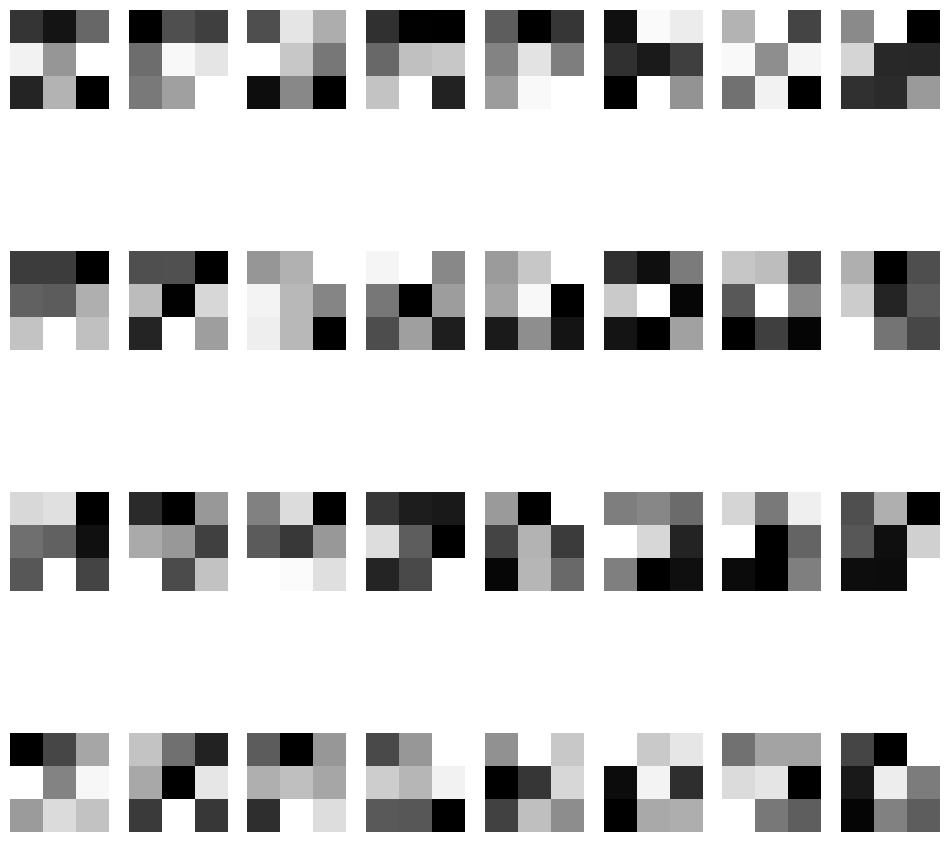

Visualizing filters of second Conv2d (32 -> 64 channels):


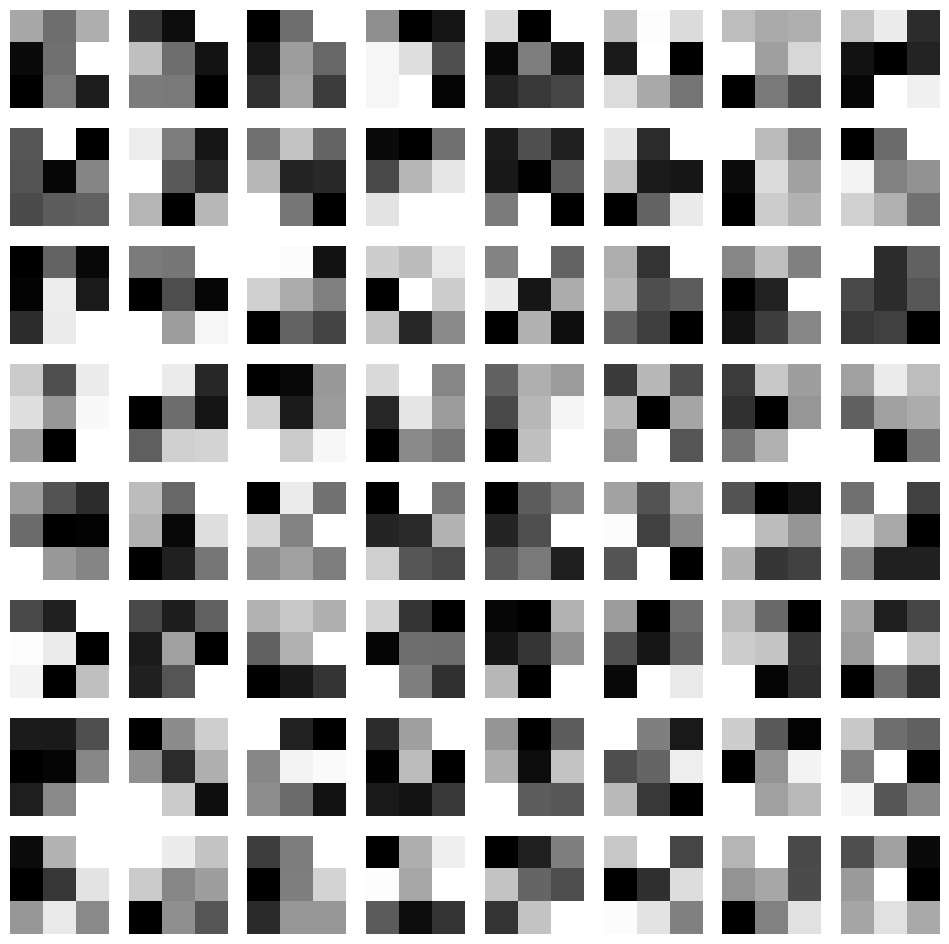

In [33]:
import torch
import matplotlib.pyplot as plt

conv1_weights = model.features[0].weight.data.cpu().numpy()  
conv2_weights = model.features[3].weight.data.cpu().numpy()  

def visualize_filters(filters, num_columns=8):
    num_filters = filters.shape[0]
    num_rows = (num_filters + num_columns - 1) // num_columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 12))
    axes = axes.flatten()

    for i in range(num_filters):
        ax = axes[i]
        ax.imshow(filters[i, 0, :, :], cmap='gray')
        ax.axis('off')

    for i in range(num_filters, len(axes)):
        axes[i].axis('off')

    plt.show()

print("Visualizing filters of first Conv2d (1 -> 32 channels):")
visualize_filters(conv1_weights)

print("Visualizing filters of second Conv2d (32 -> 64 channels):")
visualize_filters(conv2_weights)

In [34]:
print_md("""### 10. What do you think those black pixels represent in the filter visualization?
         
         #### The black pixels in the filter visualization represent the weights that are close to zero. These weights are not contributing to the feature extraction process.

            ### But why does 32->64 filters have more black pixels than 1->32 filters?
         
         ### The answer is simple - because the first set of filters learn simpler features and hence they produce more activations whereas the second set of filters learn more complex features and hence they produce fewer activations. 

         """)

### 10. What do you think those black pixels represent in the filter visualization?
         
         #### The black pixels in the filter visualization represent the weights that are close to zero. These weights are not contributing to the feature extraction process.

            ### But why does 32->64 filters have more black pixels than 1->32 filters?
         
         ### The answer is simple - because the first set of filters learn simpler features and hence they produce more activations whereas the second set of filters learn more complex features and hence they produce fewer activations. 

         

In [19]:
markdown_content = """
# Giga CNNs and Their Usefulness

Let’s talk about **Giga CNNs** and why they are useful. One great example of a large Convolutional Neural Network (CNN) is **VGG16**, developed by the Visual Geometry Group at Harvard when they were participating in the ImageNet competition.

VGG16 is a **huge model** with more than **100 million parameters**. There are many complexities associated with models like VGG16, which make them particularly good at **computer vision tasks**. A few of these complexities for VGG16 include:

1. **A deep network always performs better than a shallow one** (but there is a limit to this too). Deeper networks have the capacity to capture more complex patterns in the data.
2. One of the **key innovations** they introduced was using **small 3x3 convolutional filters**. Multiple such filters allow the model to learn complex patterns by combining smaller units, making the model powerful and efficient at recognizing patterns in images.
"""

print_md(markdown_content)


# Giga CNNs and Their Usefulness

Let’s talk about **Giga CNNs** and why they are useful. One great example of a large Convolutional Neural Network (CNN) is **VGG16**, developed by the Visual Geometry Group at Harvard when they were participating in the ImageNet competition.

VGG16 is a **huge model** with more than **100 million parameters**. There are many complexities associated with models like VGG16, which make them particularly good at **computer vision tasks**. A few of these complexities for VGG16 include:

1. **A deep network always performs better than a shallow one** (but there is a limit to this too). Deeper networks have the capacity to capture more complex patterns in the data.
2. One of the **key innovations** they introduced was using **small 3x3 convolutional filters**. Multiple such filters allow the model to learn complex patterns by combining smaller units, making the model powerful and efficient at recognizing patterns in images.


In [46]:
print_md(" ## Representation of VGG16 Model layers")

 ## Representation of VGG16 Model

![Local image](/home/satvik/corona_detection/new41.jpg)

In [ ]:
print_md("## Now let's load a pre-trained VGG16 model and see how it performs on our dataset")

In [20]:
print_md(" We will slightly tweak the image transformation part and create a new dataloader because vgg16 model architecture expects 3 channels in the input image") 

 We will slightly tweak the image transformation part and create a new dataloader because vgg16 model architecture expects 3 channels in the input image

In [21]:
metadata = pd.read_csv("/home/satvik/corona_detection/Chest_xray_Corona_Metadata.csv")
base_path = "/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset"
train_dir = f"{base_path}/train/"
test_dir = f"{base_path}/test/"

metadata['Full_Image_Path'] = metadata.apply(
    lambda row: f"{train_dir}{row['X_ray_image_name']}" if row['Dataset_type'] == 'TRAIN' else f"{test_dir}{row['X_ray_image_name']}",
    axis=1
)

train_data = metadata[metadata['Dataset_type'] == 'TRAIN']
test_data = metadata[metadata['Dataset_type'] == 'TEST']

train_paths = train_data['Full_Image_Path'].tolist()
train_labels = train_data['Label'].tolist()

test_paths = test_data['Full_Image_Path'].tolist()
test_labels = test_data['Label'].tolist()

print("Train set size:", len(train_paths))
print("Test set size:", len(test_paths))

print("Sample train paths and labels:", list(zip(train_paths[:5], train_labels[:5])))
print("Sample test paths and labels:", list(zip(test_paths[:5], test_labels[:5])))

image_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  
    ])
}

label_encoder = LabelEncoder()
label_encoder.fit(metadata['Label'])

train_labels_encoded = label_encoder.transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

print("Label encoding mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {i}")

class XRayDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB') 
        if self.transform:
            image = self.transform(image)
        label = self.labels[idx]
        return image, label

train_dataset = XRayDataset(train_paths, train_labels_encoded, transform=image_transforms['train'])
test_dataset = XRayDataset(test_paths, test_labels_encoded, transform=image_transforms['test'])

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

Train set size: 5286
Test set size: 624
Sample train paths and labels: [('/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0128-0001.jpeg', 'Normal'), ('/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0127-0001.jpeg', 'Normal'), ('/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0125-0001.jpeg', 'Normal'), ('/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0122-0001.jpeg', 'Normal'), ('/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0119-0001.jpeg', 'Normal')]
Sample test paths and labels: [('/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/IM-0021-0001.jpeg', 'Normal'), ('/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/IM-0019-0001.jpeg', 'Normal

In [22]:
from torchvision import models
vgg16 = models.vgg16(pretrained=True)
vgg16.classifier[6] = nn.Linear(in_features=4096, out_features=2)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16.to(device)

/home/satvik/miniconda3/envs/lama/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/satvik/miniconda3/envs/lama/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.parameters(), lr=0.0001)

epochs = 10 
for epoch in range(epochs):
    vgg16.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = vgg16(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_samples * 100
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

vgg16.eval()
test_predictions = []
test_labels_list = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = vgg16(images)

        _, predicted = torch.max(outputs, 1)
        test_predictions.extend(predicted.cpu().numpy())
        test_labels_list.extend(labels.cpu().numpy())

from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(test_labels_list, test_predictions) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

Epoch 1/10, Loss: 0.2225, Accuracy: 91.66%
Epoch 2/10, Loss: 0.1410, Accuracy: 95.08%
Epoch 3/10, Loss: 0.1037, Accuracy: 96.08%
Epoch 4/10, Loss: 0.1057, Accuracy: 96.44%
Epoch 5/10, Loss: 0.0705, Accuracy: 97.75%
Epoch 6/10, Loss: 0.0747, Accuracy: 97.41%
Epoch 7/10, Loss: 0.0581, Accuracy: 97.75%
Epoch 8/10, Loss: 0.0567, Accuracy: 97.96%
Epoch 9/10, Loss: 0.0553, Accuracy: 98.09%
Epoch 10/10, Loss: 0.0574, Accuracy: 98.05%
Test Accuracy: 81.73%


In [45]:
print_md("""

### Vision Transformers: A Shift in Computer Vision

##### The field of **Computer Vision** witnessed a revolutionary shift from the conventional **convolutional neural networks (CNNs)** typically used for image classification tasks. The **"Attention is All You Need"** paper introduced a new technique of focusing on different parts of the data according to their relevancy (All of it just a matrix multiplications of three matrices - **K**, **Q**, and **V**). The attention mechanism was then extensively used in the field of **NLP** to create and train **LLMs** (article for another time). But soon the attention mechanism technique was applied for images too and hence **Vision Transformers (ViTs)** - the backbone of **vision language models**. Like for an example, **ChatGPT** uses **CLIP**, the vision transformer introduced by **OPEN AI**.

### How Vision Transformers Work

##### The key thing to focus on is - for an image - if you want to understand or classify the image, you need to focus on different parts of an image with respect to other parts of an image. And that's what **ViT** does. **ViTs** divide the image into different regions and then tokenize it (basically makes it understandable for the model) and then it repeatedly calculates attention between these patches through which it gains knowledge of that patch and the relation between different patches.

### When Are ViTs Useful?

##### Well, using **ViTs** for an image classification task is an overkill, but it could be very useful in cases where you want to include both **textual** and **image** data at the same time.

"""
)



### Vision Transformers: A Shift in Computer Vision

##### The field of **Computer Vision** witnessed a revolutionary shift from the conventional **convolutional neural networks (CNNs)** typically used for image classification tasks. The **"Attention is All You Need"** paper introduced a new technique of focusing on different parts of the data according to their relevancy (All of it just a matrix multiplications of three matrices - **K**, **Q**, and **V**). The attention mechanism was then extensively used in the field of **NLP** to create and train **LLMs** (article for another time). But soon the attention mechanism technique was applied for images too and hence **Vision Transformers (ViTs)** - the backbone of **vision language models**. Like for an example, **ChatGPT** uses **CLIP**, the vision transformer introduced by **OPEN AI**.

### How Vision Transformers Work

##### The key thing to focus on is - for an image - if you want to understand or classify the image, you need to focus on different parts of an image with respect to other parts of an image. And that's what **ViT** does. **ViTs** divide the image into different regions and then tokenize it (basically makes it understandable for the model) and then it repeatedly calculates attention between these patches through which it gains knowledge of that patch and the relation between different patches.

### When Are ViTs Useful?

##### Well, using **ViTs** for an image classification task is an overkill, but it could be very useful in cases where you want to include both **textual** and **image** data at the same time.



![Local image](1_l37va2Mu8Snx6LLb13430A.png)

In [43]:
print_md("##### I'll write the complete code at once now and fine-tune the ViT model on our dataset")

##### I'll write the complete code at once now and fine-tune the ViT model on our dataset

In [44]:
import pandas as pd
from torchvision import transforms, models
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

metadata = pd.read_csv("/home/satvik/corona_detection/Chest_xray_Corona_Metadata.csv")
base_path = "/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset"
train_dir = f"{base_path}/train/"
test_dir = f"{base_path}/test/"

metadata['Full_Image_Path'] = metadata.apply(
    lambda row: f"{train_dir}{row['X_ray_image_name']}" if row['Dataset_type'] == 'TRAIN' else f"{test_dir}{row['X_ray_image_name']}",
    axis=1
)
train_data = metadata[metadata['Dataset_type'] == 'TRAIN']
test_data = metadata[metadata['Dataset_type'] == 'TEST']

train_paths = train_data['Full_Image_Path'].tolist()
train_labels = train_data['Label'].tolist()

test_paths = test_data['Full_Image_Path'].tolist()
test_labels = test_data['Label'].tolist()

print("Train set size:", len(train_paths))
print("Test set size:", len(test_paths))

print("Sample train paths and labels:", list(zip(train_paths[:5], train_labels[:5])))
print("Sample test paths and labels:", list(zip(test_paths[:5], test_labels[:5])))

image_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]) 
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  
    ])
}

label_encoder = LabelEncoder()
label_encoder.fit(metadata['Label'])

train_labels_encoded = label_encoder.transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

print("Label encoding mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {i}")

class XRayDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB') 
        if self.transform:
            image = self.transform(image)
        label = self.labels[idx]
        return image, label

train_dataset = XRayDataset(train_paths, train_labels_encoded, transform=image_transforms['train'])
test_dataset = XRayDataset(test_paths, test_labels_encoded, transform=image_transforms['test'])

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

vit = models.vit_b_16(pretrained=True)  
vit.head = nn.Linear(in_features=768, out_features=2)  

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vit.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vit.parameters(), lr=0.0001)

epochs = 10  
for epoch in range(epochs):
    vit.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = vit(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_samples * 100
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

vit.eval()
test_predictions = []
test_labels_list = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = vit(images)

        _, predicted = torch.max(outputs, 1)
        test_predictions.extend(predicted.cpu().numpy())
        test_labels_list.extend(labels.cpu().numpy())

test_accuracy = accuracy_score(test_labels_list, test_predictions) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")


Train set size: 5286
Test set size: 624
Sample train paths and labels: [('/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0128-0001.jpeg', 'Normal'), ('/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0127-0001.jpeg', 'Normal'), ('/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0125-0001.jpeg', 'Normal'), ('/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0122-0001.jpeg', 'Normal'), ('/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0119-0001.jpeg', 'Normal')]
Sample test paths and labels: [('/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/IM-0021-0001.jpeg', 'Normal'), ('/home/satvik/corona_detection/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/IM-0019-0001.jpeg', 'Normal

/home/satvik/miniconda3/envs/lama/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/satvik/miniconda3/envs/lama/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Loss: 0.1875, Accuracy: 93.32%
Epoch 2/10, Loss: 0.1097, Accuracy: 95.72%
Epoch 3/10, Loss: 0.0981, Accuracy: 96.31%
Epoch 4/10, Loss: 0.0902, Accuracy: 96.63%
Epoch 5/10, Loss: 0.0839, Accuracy: 96.82%
Epoch 6/10, Loss: 0.0832, Accuracy: 96.95%
Epoch 7/10, Loss: 0.0816, Accuracy: 97.14%
Epoch 8/10, Loss: 0.0813, Accuracy: 97.24%
Epoch 9/10, Loss: 0.0795, Accuracy: 96.99%
Epoch 10/10, Loss: 0.0757, Accuracy: 97.39%
Test Accuracy: 81.73%


In [55]:
print_md("""### Let's compare the performance of all the models we trained
         
            #### 1. Simple CNN - 75.48% 
            #### 2. VGG16 - 81.73%
            #### 3. ViT - 81.73%
         
         ##### you can notice in the results above that vgg16 and ViT are performing better than simple cnn model. This is because of the complexity of the models and the number of parameters they have. The more complex the model, the better it performs on the data. But remember, there is a limit to this too. You can't just keep increasing the number of parameters and expect the model to perform better. There is a trade-off between the number of parameters and the performance of the model.
         ##### But you should also wonder why VGG16 and ViT are performing the same and ended up with the same Test Accuracy of 81.73% - this could be because of many reasons but one of the reasons might be the dataset itself. So, both the models are missing on the same images and hence the same accuracy. But this requires in-depth exploration of which images are being misclassified by the models and what can be done to improve the performance of the models.

         ##### You can also think about - if it's worth it to use big models like VGG16 and ViT for this dataset if the performance is almost the same as a simple CNN model. This is where the concept of model complexity and computational efficiency comes into play. You should always choose a model that is computationally efficient and performs well on the data.
         """)


### Let's compare the performance of all the models we trained
         
            #### 1. Simple CNN - 75.48% 
            #### 2. VGG16 - 81.73%
            #### 3. ViT - 81.73%
         
         ##### you can notice in the results above that vgg16 and ViT are performing better than simple cnn model. This is because of the complexity of the models and the number of parameters they have. The more complex the model, the better it performs on the data. But remember, there is a limit to this too. You can't just keep increasing the number of parameters and expect the model to perform better. There is a trade-off between the number of parameters and the performance of the model.
         ##### But you should also wonder why VGG16 and ViT are performing the same and ended up with the same Test Accuracy of 81.73% - this could be because of many reasons but one of the reasons might be the dataset itself. So, both the models are missing on the same images and hence the same accuracy. But this requires in-depth exploration of which images are being misclassified by the models and what can be done to improve the performance of the models.

         ##### You can also think about - if it's worth it to use big models like VGG16 and ViT for this dataset if the performance is almost the same as a simple CNN model. This is where the concept of model complexity and computational efficiency comes into play. You should always choose a model that is computationally efficient and performs well on the data.
         